### DATA ANALYSIS OF PAKISTAN LARGEST ECOMMERCE DATASET

In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Pakis_data = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")       # import the ecommerce dataset
Pakis_data.head(2)

c:\Users\OmotayoWaheed\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,07/01/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,cod,07/01/2016,#REF!,"1,950",2016,7,2016-7,Jul-16,FY17,1.0
1,211133,canceled,07/01/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,cod,07/01/2016,Gross,240,2016,7,2016-7,Jul-16,FY17,2.0


In [3]:
Pakis_data.shape     # check the number of available rows and columns

(584524, 21)

In [4]:
Pakis_data.columns    # List the column names present in the data for better understanding

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [5]:
Pakis_data.info()      # check the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [6]:
Pakis_data.rename(columns={' MV ':'MV'},inplace=True)                   #rename columns for better analysis and understanding
Pakis_data.rename(columns={'category_name_1':'Category'},inplace=True)    
Pakis_data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'Category', 'sales_commission_code',
       'discount_amount', 'payment_method', 'Working Date', 'BI Status', 'MV',
       'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [7]:
null_percentage = Pakis_data.isna().sum()*100/len(Pakis_data)    #  percentage of empty values in each column
null_percentage

item_id                   0.000000
status                    0.002566
created_at                0.000000
sku                       0.003422
price                     0.000000
qty_ordered               0.000000
grand_total               0.000000
increment_id              0.000000
Category                  0.028057
sales_commission_code    23.467813
discount_amount           0.000000
payment_method            0.000000
Working Date              0.000000
BI Status                 0.000000
MV                        0.000000
Year                      0.000000
Month                     0.000000
Customer Since            0.001882
M-Y                       0.000000
FY                        0.000000
Customer ID               0.001882
dtype: float64

In [8]:
Pakis_data.isnull().sum()              #  Count of null values per column

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
Category                    164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
MV                            0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [9]:
# Fill null values 
Pakis_data['sales_commission_code'].fillna(Pakis_data['sales_commission_code'].mode,inplace =True)
Pakis_data['Category'].fillna(Pakis_data['Category'].mode,inplace =True)
Pakis_data['status'] = Pakis_data['status'].fillna('not_available')

In [10]:
# Describe the data
Pakis_data.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


In [11]:
# check for duplicates
print(Pakis_data.duplicated().sum()) # Check for duplicates

0


In [12]:
# correct the necessary columns datatypes
import datetime
Pakis_data['created_at']= pd.to_datetime(Pakis_data['created_at'])
Pakis_data['Customer ID']=Pakis_data['Customer ID'].astype(str)
Pakis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  int64         
 1   status                 584524 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  int64         
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   Category               584524 non-null  object        
 9   sales_commission_code  584524 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  obje

In [13]:
# check for unique column values of the payment method columns
print("The unique payment methods are {}".format(Pakis_data.payment_method.unique()))
print("The Purchase Years are {}".format(Pakis_data.Year.unique()))
print("The order status are {}".format(Pakis_data.status.unique()))

The unique payment methods are ['cod' 'ublcreditcard' 'mygateway' 'customercredit' 'cashatdoorstep'
 'mcblite' 'internetbanking' 'marketingexpense' 'productcredit'
 'financesettlement' 'Payaxis' 'jazzvoucher' 'jazzwallet' 'Easypay'
 'Easypay_MA' 'easypay_voucher' 'bankalfalah' 'apg']
The Purchase Years are [2016 2017 2018]
The order status are ['complete' 'canceled' 'order_refunded' 'received' 'refund' 'closed'
 'fraud' 'holded' 'exchange' 'pending_paypal' 'paid' '\\N' 'cod' 'pending'
 'not_available' 'processing' 'payment_review']


In [14]:
 # replace duplicates and streamline to specifics in the payment method column.
payment_to_replace = {'cashatdoorstep': 'cod', 'Easypay_MA':'Easypay', 'easypay_voucher':'Easypay','jazzvoucher':'jazzwallet','internetbanking':'Payaxis','mygateway':'Payaxis','marketingexpense':'Payaxis'} 
Pakis_data =Pakis_data.replace({"payment_method": payment_to_replace})  

In [15]:
 # replace duplicates and streamline to specifics in the status column.
status_to_replace = {'cod': 'complete', 'order_refunded':'refund', 'received':'complete','\\N':'not_available','closed':'complete','pending_paypal':'pending','paid':'complete','processing':'pending','payment_review':'pending'} 
Pakis_data =Pakis_data.replace({"status": status_to_replace})  

In [16]:
Pakis_data['status'].unique()

array(['complete', 'canceled', 'refund', 'fraud', 'holded', 'exchange',
       'pending', 'not_available'], dtype=object)

### EXPLORATORY DATA ANALYSIS

array([[<AxesSubplot:title={'center':'item_id'}>,
        <AxesSubplot:title={'center':'created_at'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'qty_ordered'}>,
        <AxesSubplot:title={'center':'grand_total'}>,
        <AxesSubplot:title={'center':'discount_amount'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>]],
      dtype=object)

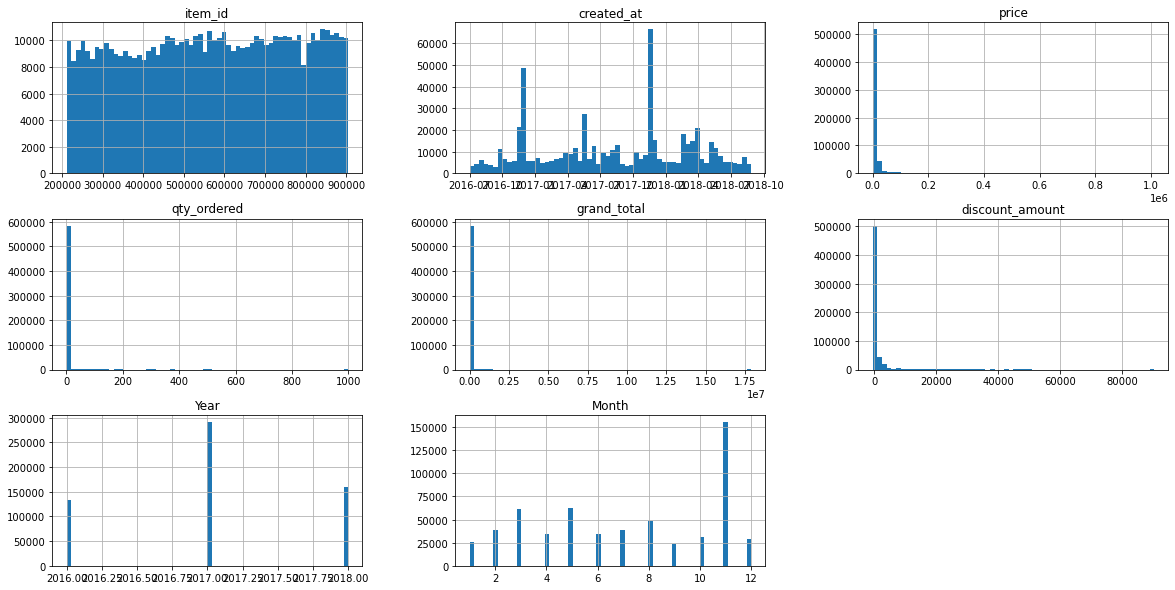

In [17]:
#plot a hist on our dataset
Pakis_data.hist(bins=60, figsize=(20,10))

In [18]:
# Get the top 10 category of Items sold
Top10Category=Pakis_data.groupby('Category')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
print(Top10Category)

             Category   count
10  Mobiles & Tablets  115710
9       Men's Fashion   92221
15    Women's Fashion   59721
1          Appliances   52413
14         Superstore   43613
2   Beauty & Grooming   41496
13            Soghaat   34011
11             Others   29218
7       Home & Living   26504
5       Entertainment   26326


Result: The most purchased category of item is Mobiles & Tablets

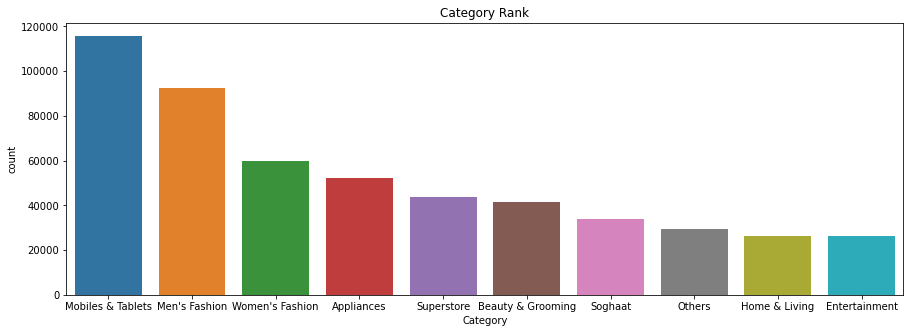

In [19]:
Category=Pakis_data.groupby('Category')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(15,5))
graph=sns.barplot(x='Category',y='count',data=Category)
graph.set_title('Category Rank')
plt.show()

In [20]:
# Get the year with the highest sales
Year_highest_sales=Pakis_data.groupby('Year')['grand_total'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False).head()
Year_highest_sales

,Year,sum
1,2017,2.247266e+09
2,2018,2.093500e+09
0,2016,6.455853e+08


Result: The ecommerce business recorded the highest sales in the year 2017

In [21]:
print(Pakis_data['discount_amount'].sum())
print(Pakis_data['qty_ordered'].sum())
print(Pakis_data['price'].sum())

291965514.9272999
757770
3710995301.8300004


In [22]:
# get the count of order status
orderstatus = Pakis_data.groupby('status')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
print(orderstatus)

          status   count
1       complete  315487
0       canceled  201249
7         refund   67579
6        pending     145
4         holded      31
5  not_available      19
3          fraud      10
2       exchange       4


Result: There are more completed order in the dataset but quite significant number of orders were canceled

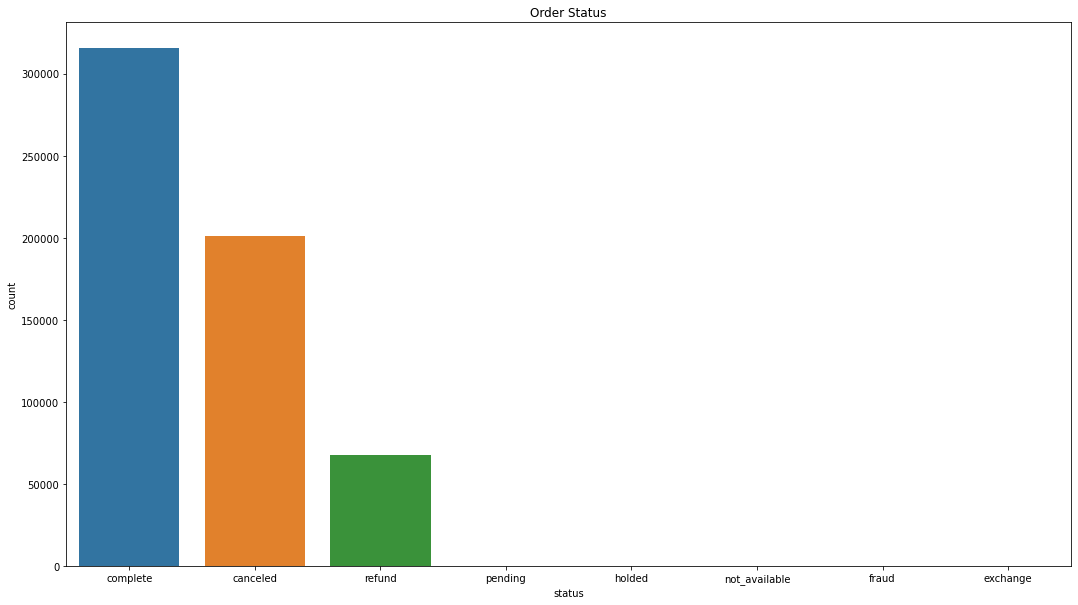

In [23]:
plt.figure(figsize=(18,10))
graph=sns.barplot(x='status',y='count',data=orderstatus)
graph.set_title('Order Status')
plt.show()

In [24]:
# Most used payment method
paymethod=Pakis_data.groupby('payment_method')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
print(paymethod)

    payment_method   count
4              cod  272692
0          Easypay  128104
1          Payaxis   98827
7       jazzwallet   50778
3      bankalfalah   23065
5   customercredit    7555
2              apg    1758
10   ublcreditcard     882
8          mcblite     723
9    productcredit     125


Result: The most used payment method is Cash on delivery

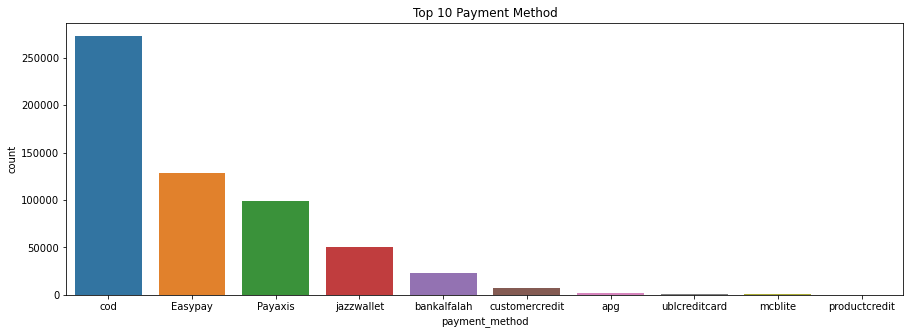

In [25]:
# Visualization of the most used payment method
plt.figure(figsize=(15,5))
graph=sns.barplot(x='payment_method',y='count',data=paymethod)
graph.set_title('Top 10 Payment Method')
plt.show()

In [26]:
#Find the correlation between the numerical variables in the data
Pakis_data.corr()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month
item_id,1.000000,0.141596,0.033381,0.049265,0.136515,0.920564,-0.292860
price,0.141596,1.000000,-0.017629,0.277607,0.455578,0.129052,-0.034473
qty_ordered,0.033381,-0.017629,1.000000,0.753487,-0.007621,0.039236,-0.033652
grand_total,0.049265,0.277607,0.753487,1.000000,0.104825,0.048432,-0.020887
discount_amount,0.136515,0.455578,-0.007621,0.104825,1.000000,0.116063,-0.013386
Year,0.920564,0.129052,0.039236,0.048432,0.116063,1.000000,-0.634711
Month,-0.292860,-0.034473,-0.033652,-0.020887,-0.013386,-0.634711,1.000000
